# Импорт необходимых библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Раздел 1 - работа с синтетическими данными

## Генерация синтетических данных

#### Воспользуемся некоторыми функциями из исходного блокнота

In [ ]:
# Для генерации данных воспользуемся кодом, любезно предоставленным в исходном блокноте

def true_fun(x, a=np.pi, b=0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)

    if f is None: f = lambda x: x # line
    x = np.sum([ai * np.power(x, i + 1) for i, ai in enumerate(a)], axis=0)

    return f(x + b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max = 1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)

    if random_x:
        x = np.sort(np.random.rand(N)) * x_max
    else:
        x = np.linspace(0, x_max, N)

    y_true = np.array([])

    for f_ in np.append([], f):
        y_true = np.append(y_true, true_fun(x, a, b, f_))

    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

In [ ]:
# Также возьмем из исходников функцию визуализации

def vis_data(y, y_true, x, title):
    fig  = plt.figure(figsize=(10, 7))
    plt.scatter(x[:, 0], y, edgecolor = 'b', label = "Зашумленные Данные",s = 196, alpha = 0.6)
    plt.scatter(x[:, 0], y_true,label = "Реальные Данные", s = 81, c = 'g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x',fontsize = 35)
    plt.ylabel('y',fontsize = 35)
    plt.legend(fontsize = 25)
    plt.title(title, fontsize = 25 )
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);
    plt.tight_layout()

### Набор синтетических данных №1

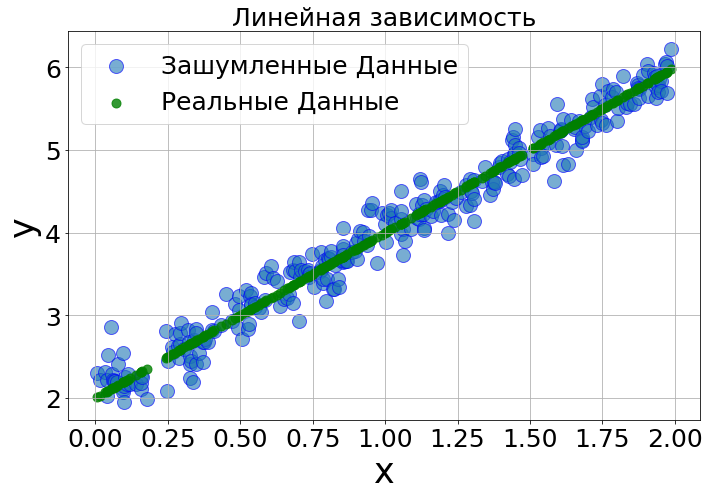

In [ ]:
# Для ознакомления с возможностями позаимствованных функций импортируем также пример по созданию синтетического датасета из исходного блокнота,
# оставив линейную зависимость, внеся небольшие корректировки в границы значений

# Создадим отдельные переменные для создаваемого набора данных №1 для сохранения и последующей обработки на различных моделях

noise_power = 0.2                                       # Докинем шумов здесь чутка

y_line, y_true_line, x_line = dataset(a = 2, b = 2,     #
                       f = None,  N = 300,              # функцию оставим как есть, линейной. Число элементов в выборке увеличим до 300
                       x_max = 2,                       # увеличим предел оси x
                       noise_power = noise_power,       #
                       seed = 33)                       #

vis_data(y_line, y_true_line, x_line, 'Линейная зависимость')

### Набор синтетических данных №2

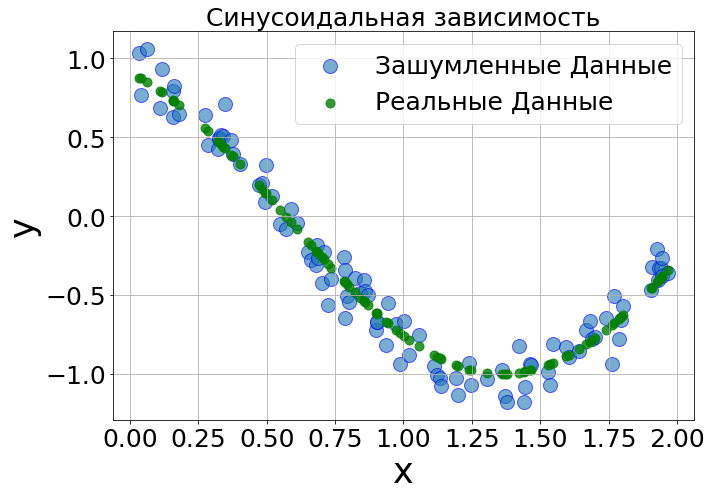

In [ ]:
# Второй набор данных для анализа создадим по аналогии с первым
# но усложним функцию, выбрав нелинейную np.sin

# Создадим переменные для создаваемого набора данных №2

noise_power = 0.1                                       #

y_sin, y_true_sin, x_sin = dataset(a = 2, b = 2,                    #
                       f = np.sin,  N = 100,            # в аргументе передадим вид функции np.sin. Число элементов в выборке 100
                       x_max = 2,                       # увеличим предел оси x
                       noise_power = noise_power,       #
                       seed = 33)                       #

vis_data(y_sin, y_true_sin, x_sin, 'Синусоидальная зависимость')

### Набор синтетических данных №3

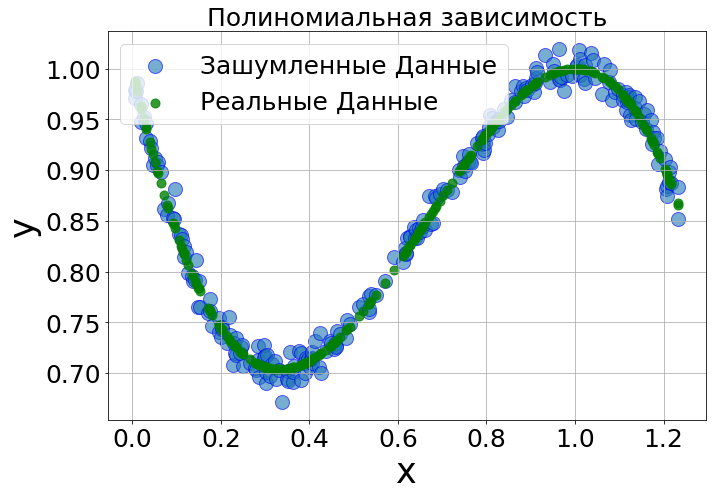

In [ ]:
# Третий набор данных для анализа создадим в виде полиномиальной зависимости
#

noise_power = 0.01

y_poly, y_true_poly, x_poly = dataset(a = [-2, 4, -2], b = 1,
                                      f = None,  N = 250,
                                      x_max =1.25,
                                      noise_power = noise_power,
                                      seed = 42)
vis_data(y_poly, y_true_poly, x_poly, 'Полиномиальная зависимость')

### Набор синтетических данных №4

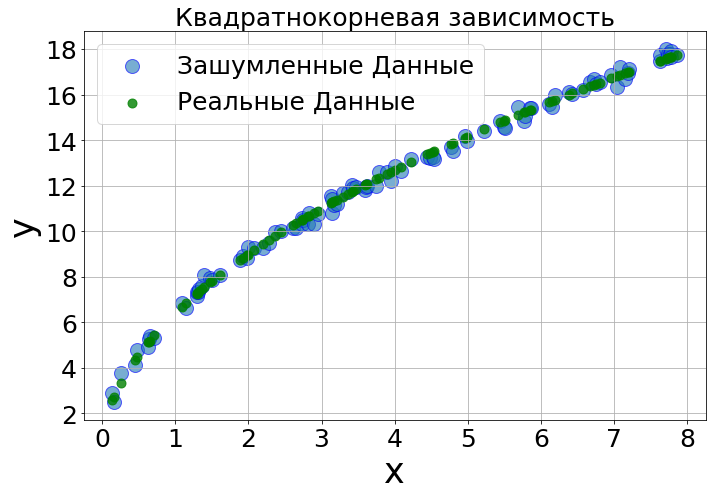

In [ ]:
#
#

noise_power = 0.2                                       #

y_sqrt, y_true_sqrt, x_sqrt = dataset(a = 40, b = 1,    #
                       f = np.sqrt,  N = 100,           # в аргументе передадим вид функции np.sin. Число элементов в выборке 100
                       x_max = 8,                       # увеличим предел оси x
                       noise_power = noise_power,       #
                       seed = 33)                       #

vis_data(y_sqrt, y_true_sqrt, x_sqrt, 'Квадратнокорневая зависимость')

## Подготовка необходимого инструментария

### Функции и классы, бессовестно скопированные из учебного колаба

In [ ]:
# Функция разбиения данных

def train_test_split(x, y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    if random_state: np.random.seed(random_state)

    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle: np.random.shuffle(idxs)

    if test_size and train_size is None:
        if (test_size<= 1):  train_size = 1 - test_size
        else:  train_size = size - test_size
        test_size = None

    if train_size is None or train_size > size: train_size = size

    if (train_size<= 1): train_size *= size

    if test_size is not None:
        if test_size<= 1: test_size *= size
        if test_size>size: test_size = size-train_size
    else: test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]

    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, y_train.squeeze(), x_val, y_val.squeeze(), x_test, y_test.squeeze()
    return x_train, y_train.squeeze(), x_val, y_val.squeeze()

In [ ]:
# Воспользуемся любезно предоставленным классом линейной регрессии

class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        self.n_batches = n_batches

        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            self.batch_size = y.size

        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size

        for i in range(self.epochs):
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)):

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch)
                self.weights = self.update()
                loss += self.loss(yhat,  y_batch)

                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches

        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [ ]:
# Немного визуализации никогда не повредит

def plot_model_class(x_train, y_train, x_test, x, y, model):
    plt.plot(x_train[:,0], model.predict(x_train),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], model.predict(x_test),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=4,c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35);
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);

In [ ]:
def vis_weigths(weights):
    numbers = np.arange(0, len(weights))
    tick_labels = ['w' + str(num) for num in numbers]
    cc=[''] * len(numbers)
    for n, val in enumerate(weights):
        if val < 0:
            cc[n] = 'red'
        elif val >= 0:
            cc[n] = 'blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0, len(weights)), tick_labels );

In [ ]:
# Также злостно экспроприированная функция добавления полиномов

def to_polynom(x, order = 1, add_bias = False):
    order_range = range(0 if add_bias else 1, order + 1, 1)
    x = np.atleast_1d(x)[:]
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x, i))
    return out.reshape(-1, x.size).T

In [ ]:
class MinMaxScaler:
    def __init__(self):
        self.min = 0
        self.max = 0
    def fit(self,X):
        self.min = X.min(axis = 0)
        self.max = X.max(axis = 0)
        return self
    def transform(self,X):
        return (X- self.min)/(self.max-self.min)
    def fit_transform(self,X):
        return self.fit(X).transform(X)

In [ ]:
class StandardScaler:
    def __init__(self):
        self.mean = 0
        self.std = 1
    def fit(self,X):
        self.mean = X.mean(axis = 0)
        self.std = X.std(axis = 0)
        return self
    def transform(self,X):
        return (X- self.mean)/(self.std)
    def fit_transform(self,X):
        return self.fit(X).transform(X)

In [ ]:
# А как же без регуляризации (берем самую полную и лучшую)

class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(np.abs(self.weights[1:]))
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term

    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

In [ ]:
# Своя собственная функция разукрашивания вывода метрики R2

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def r2_print(r2_train, r2_test):
    if (r2_train < 0.70) or (r2_test < 0.70):
        print(f'R2 train is low! == {bcolors.BOLD}{bcolors.FAIL}{r2_train}{bcolors.ENDC}. R2 test is low! == {bcolors.BOLD}{bcolors.FAIL}{r2_test}{bcolors.ENDC}. Try more!')
        return
    if (0.70 < r2_train < 0.79) or (0.70 < r2_test < 0.79):
        print(f'R2 train is better, but no best == {bcolors.BOLD}{bcolors.WARNING}{r2_train}{bcolors.ENDC}. R2 test is better, but no best == {bcolors.BOLD}{bcolors.WARNING}{r2_test}{bcolors.ENDC}. Try more!')
        return
    if (r2_train > 0.80) or (r2_test > 0.80):
        print(f'R2 train is OK! == {bcolors.BOLD}{bcolors.OKGREEN}{r2_train}{bcolors.ENDC}. R2 test is OK! == {bcolors.BOLD}{bcolors.OKGREEN}{r2_test}{bcolors.ENDC}. Congratulations!')
        return

## Применение моделей к исходным данным

### Модель №1 - набор данных на основе линейной функции

#### Заход №1 (простая линейная регрессия)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x_line, y_line,  test_size=0.3) # Разделяем данные на тренировочные и тестовые

In [ ]:
regr_lin = LinearRegression(learning_rate=0.1,           # Создаем экземпляр класса линейной регрессии, скорость 0.1, 100 эпох
                                epochs=100, batch_size=10,
                                n_batches=None)

regr_lin.fit(x_train, y_train)

R2 train is OK! == 0.968. R2 test is OK! == 0.9702. Congratulations!


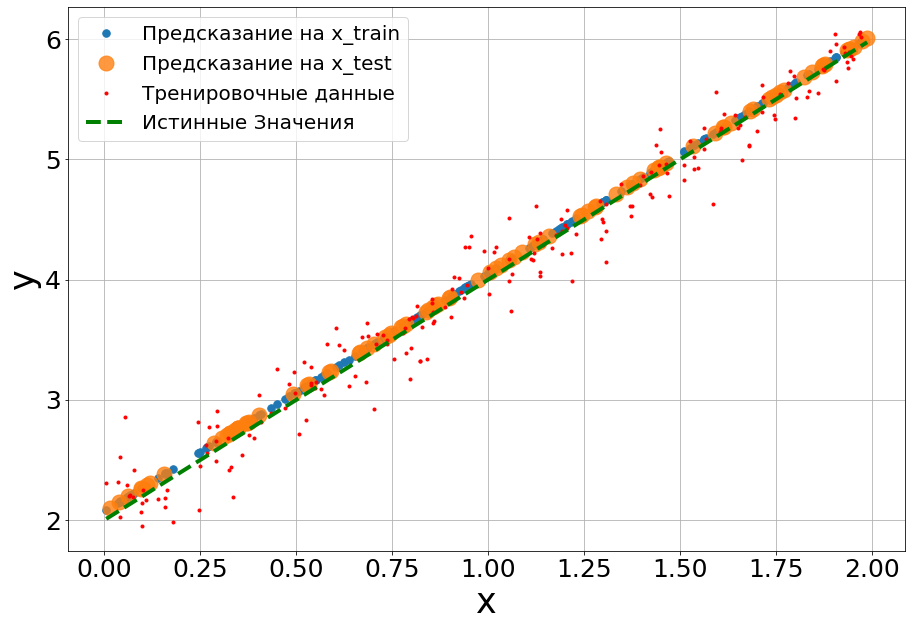

In [ ]:
fig = plt.figure(figsize=(15, 10))

plot_model_class(x_train, y_train, x_test, x_line, y_true_line, regr_lin)   # Отрисовываем, что получилось

r2_print(round(regr_lin.score(x_train, y_train), 4), round(regr_lin.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод: хорошее попадание**

#### Заход №2 (простая линейная регрессия с регуляризацией

In [ ]:
# В целях стремления к перфекционизму попробую применить регуляризацию

regr_l1l2_line = ElasticRegression(learning_rate=0.1,
                              epochs=300, batch_size=10,
                              l1_penalty = 0.0005, l2_penalty = 0.005)  # Тут можно побаловаться с настройками регуляризации и посмотреть, что будет

regr_l1l2_line.fit(x_train, y_train)

R2 train is OK! == 0.9702. R2 test is OK! == 0.9739. Congratulations!


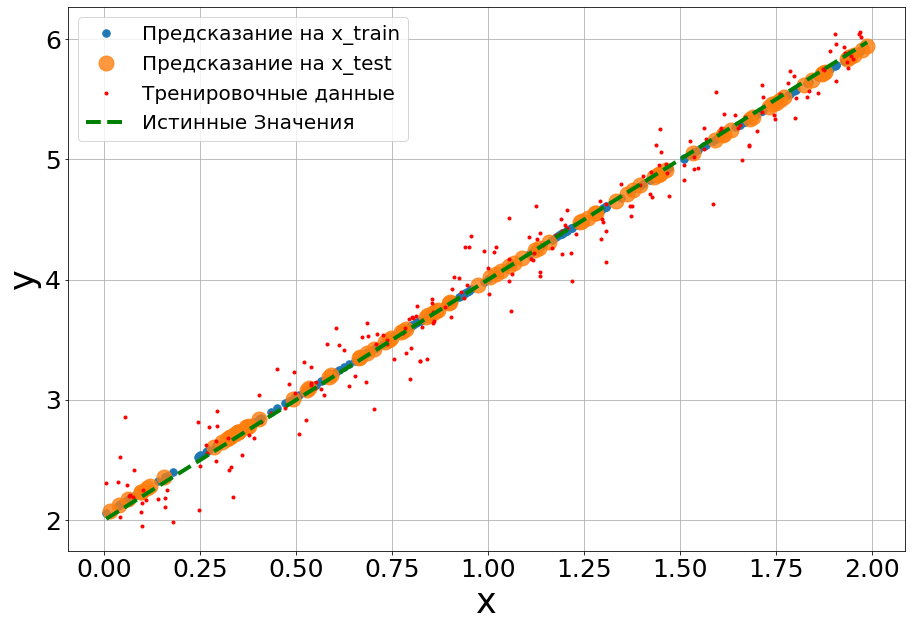

In [ ]:
fig = plt.figure(figsize=(15, 10))

plot_model_class(x_train, y_train, x_test, x_line, y_true_line, regr_l1l2_line)

r2_print(round(regr_l1l2_line.score(x_train, y_train), 4), round(regr_l1l2_line.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Бинго, точно в яблочко** Результат чуть получше, чем без регуляризации.

### Модель №2 - набор данных на основе гармонической функции (sin)

#### Заход №1 - попытка аппроксимации с помощью простой линейной регрессии (фэйл)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x_sin, y_sin,  test_size=0.25) # Тут меняем исходные данные на второй набор и уменьшим размер тестовой выборки

In [ ]:
regr_sin_lin = LinearRegression(learning_rate=0.1,
                                epochs=100, batch_size=10,
                                n_batches=None)

regr_sin_lin.fit(x_train, y_train)

R2 train is low! == 0.5535. R2 test is low! == 0.5183. Try more!


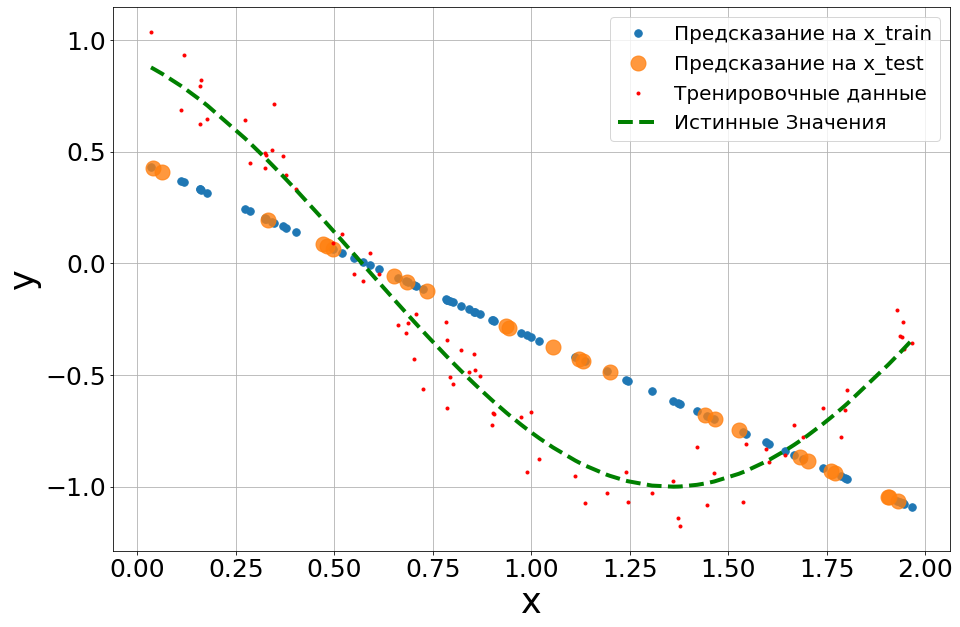

In [ ]:
fig = plt.figure(figsize=(15, 10))

plot_model_class(x_train, y_train, x_test, x_sin, y_true_sin, regr_sin_lin)

r2_print(round(regr_sin_lin.score(x_train, y_train), 4), round(regr_sin_lin.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод: не ахти.** Линейная функция тут не работет, нужно добавить полиномов и степеней для начала

#### Заход №2 - добавление полиномов 2-й степени (более-менее)

Пробую добавить полиномов для улучшения результата. Пользуюсь для этого функцией из исходного колаба

In [ ]:
x_ = to_polynom(x_sin, order = 2) # Добавляем в модель полиномов 2-й степени

x_train, y_train,  x_test, y_test = train_test_split(x_, y_sin, test_size=0.25)

In [ ]:
regr_sin_poly = LinearRegression(learning_rate=0.1,
                            epochs=200, batch_size=10,
                            n_batches=None)

regr_sin_poly.fit(x_train, y_train)

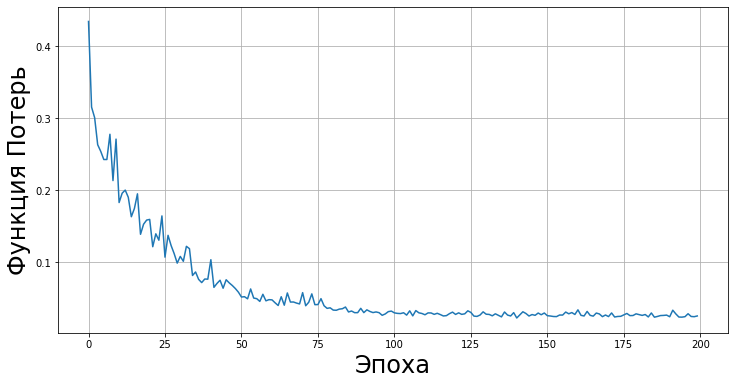

In [ ]:
regr_sin_poly.plot_cost() # Отрисовываем график динамики функции потерь

R2 train is OK! == 0.9401. R2 test is OK! == 0.9049. Congratulations!


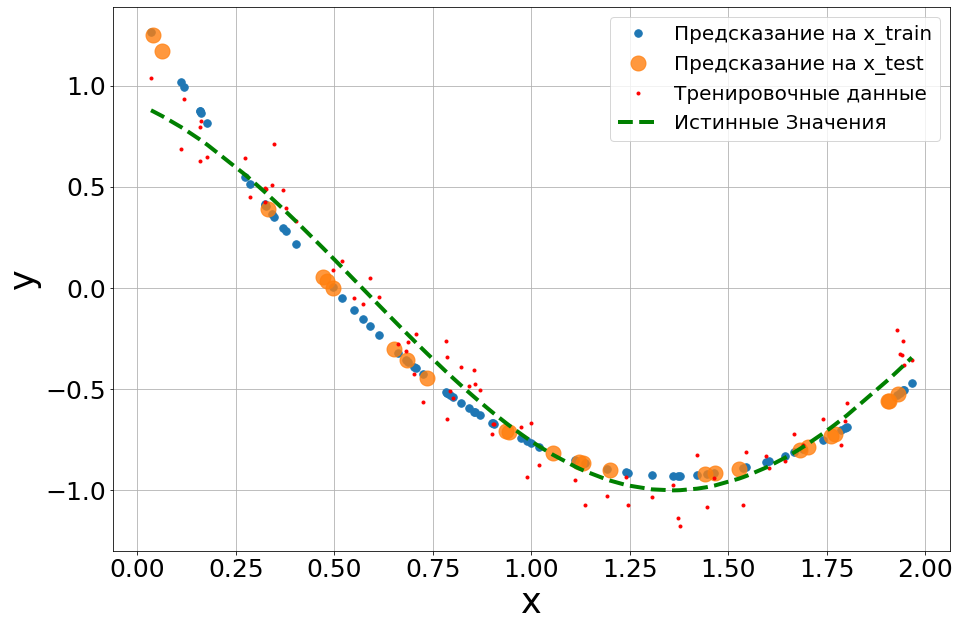

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x_sin, y_true_sin, regr_sin_poly)

r2_print(round(regr_sin_poly.score(x_train, y_train), 4), round(regr_sin_poly.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** тут всё нормас вроде. Не идеал, но всяко лучше линейной функции. При увеличении степени полинома больше 3 для линейной регрессии в данном конкретном случае колаб в ошибку переполнения буфера выпадает.

#### Заход №3 - добавление полиномов 3-й степени (ОК)

In [ ]:
x_ = to_polynom(x_sin, order = 3) #

x_train, y_train,  x_test, y_test = train_test_split(x_, y_sin, test_size=0.25)

In [ ]:
regr_sin_poly = LinearRegression(learning_rate=0.01,
                            epochs=300, batch_size=10,
                            n_batches=None)

regr_sin_poly.fit(x_train, y_train)

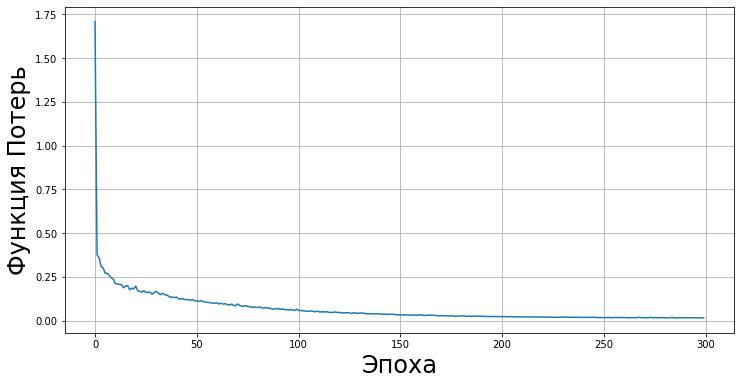

In [ ]:
regr_sin_poly.plot_cost()

R2 train is OK! == 0.963. R2 test is OK! == 0.9511. Congratulations!


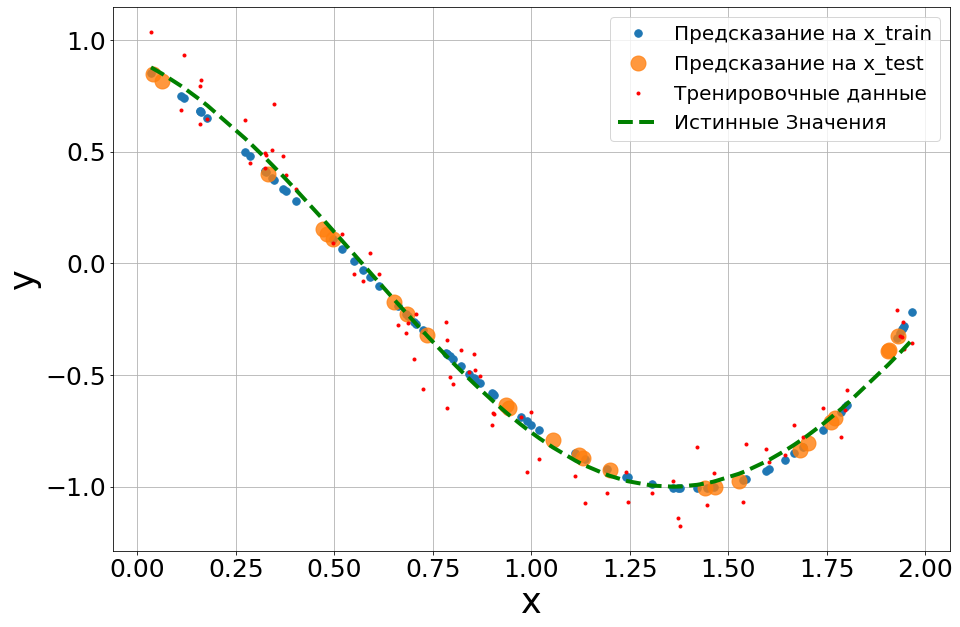

In [ ]:
fig  = plt.figure(figsize=(15, 10))

plot_model_class(x_train, y_train, x_test, x_sin, y_true_sin, regr_sin_poly)

r2_print(round(regr_sin_poly.score(x_train, y_train), 4), round(regr_sin_poly.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** Очевидно улучшение R2 на 0.2 пункта, что неплохо.

#### Заход №4 - повышаем степени полиномов (ухудшение ситуации)

R2 train is OK! == 0.9311. R2 test is OK! == 0.9288. Congratulations!


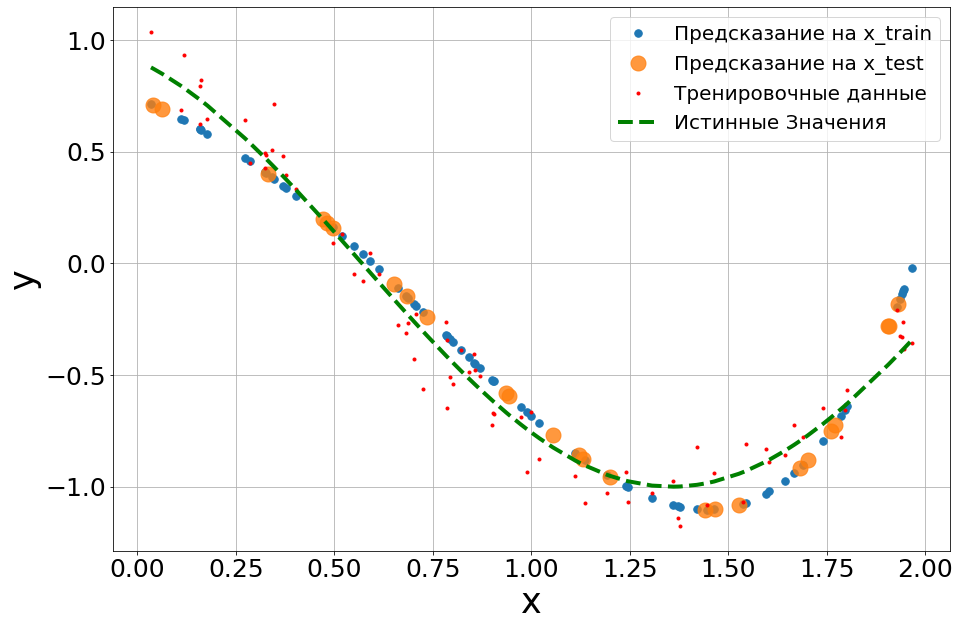

In [ ]:
x_ = to_polynom(x_sin, order = 4) #

x_train, y_train,  x_test, y_test = train_test_split(x_, y_sin, test_size=0.25)

regr_sin_poly = LinearRegression(learning_rate=0.01,
                            epochs=300, batch_size=10,
                            n_batches=None)

regr_sin_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15, 10))

plot_model_class(x_train, y_train, x_test, x_sin, y_true_sin, regr_sin_poly)

r2_print(round(regr_sin_poly.score(x_train, y_train), 4), round(regr_sin_poly.score(x_test, y_test), 4))

**Вывод:** очевидно значительное ухудшение ситуации (как визуально, так и по метрике). Значит нужно останавливаться на полиномах 3 степени.

#### Заход №3 плюс регуляризация - (ОК)

In [ ]:
x_ = to_polynom(x_sin, order = 3) #

x_train, y_train,  x_test, y_test = train_test_split(x_, y_sin, test_size=0.25)

In [ ]:
# В целях стремления к перфекционизму попробую применить регуляризацию

regr_l1l2_poly = ElasticRegression(learning_rate=0.01,
                              epochs=300, batch_size=10,
                              l1_penalty = 0.001, l2_penalty = 0.01)  # Тут можно побаловаться с настройками регуляризации и посмотреть, что будет

regr_l1l2_poly.fit(x_train, y_train)

R2 train is OK! == 0.9603. R2 test is OK! == 0.9478. Congratulations!


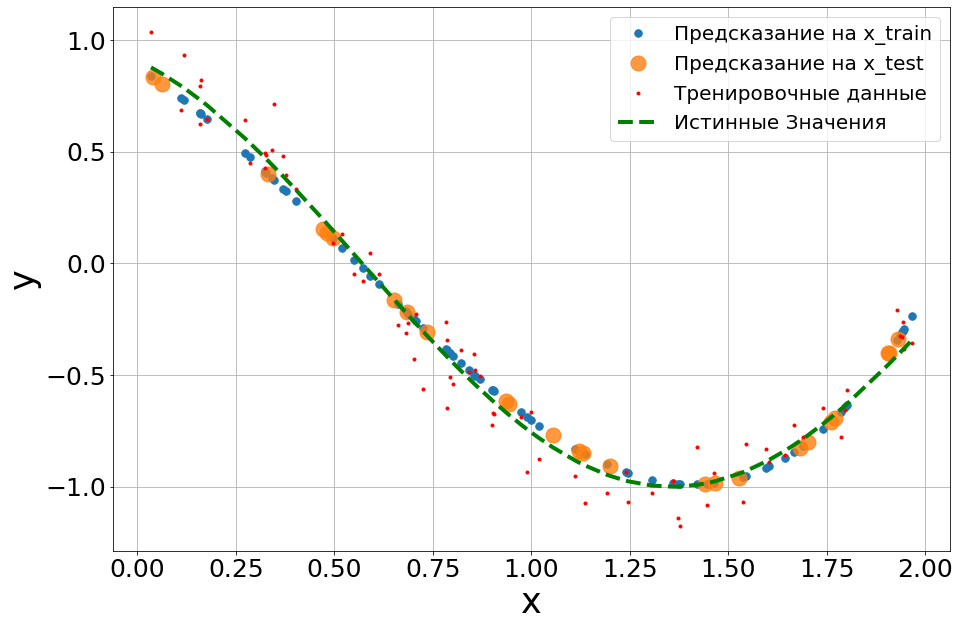

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x_sin, y_true_sin, regr_l1l2_poly)

r2_print(round(regr_l1l2_poly.score(x_train, y_train), 4), round(regr_l1l2_poly.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** для данного случая изменения от регуляризации неочевидные, заметно снижение R2 от повышения коэффициентов регуляризации L1, L2. Но в целом результат более-менее.

### Модель №3 - набор данных на основе полиномиальной функции

#### Заход №1 - просто добавляем полиномов (средненький результат)

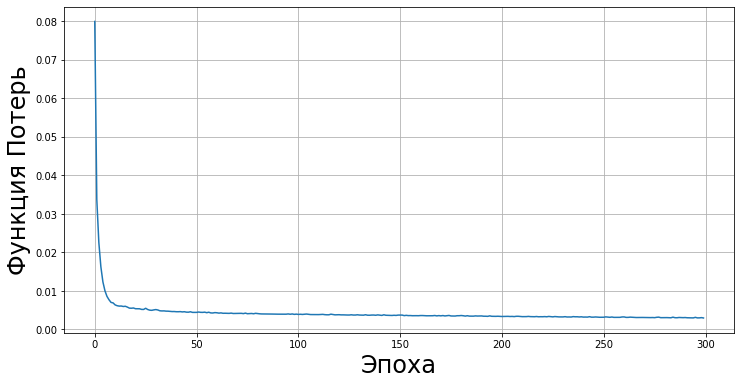

In [ ]:
x_ = to_polynom(x_poly, order = 6) # Произвольно балуемся со степенями полинома и смотрим изменения на графике и R2 (начиная от 6-й степени более-менее, ниже - фэйл)

x_train, y_train,  x_test, y_test = train_test_split(x_, y_poly, test_size=0.25)

regr_poly = LinearRegression(learning_rate=0.01,
                            epochs=300, batch_size=10,
                            n_batches=None)

regr_poly.fit(x_train, y_train)

regr_poly.plot_cost()

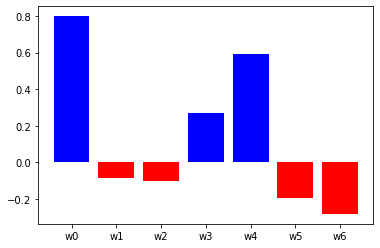

In [ ]:
w, b = regr_poly.get_w_and_b()

vis_weigths(np.hstack([b, w]))

R2 train is better, but no best == 0.7402. R2 test is better, but no best == 0.7626. Try more!


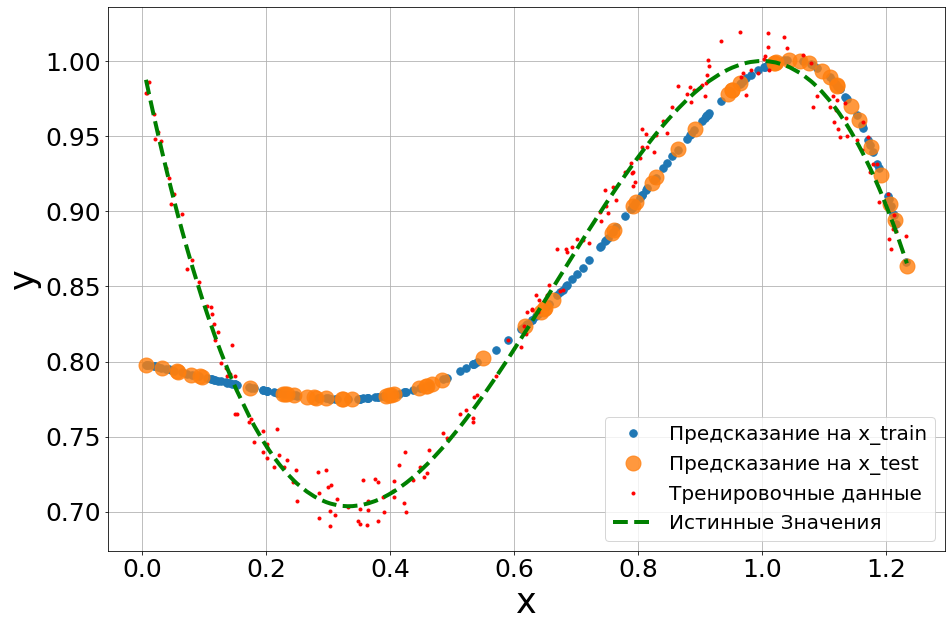

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x_poly, y_true_poly, regr_poly)

r2_print(round(regr_poly.score(x_train, y_train), 4), round(regr_poly.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** от безысходности бы подошло, но мы будем стремиться к совершенству

#### Заход №2 - применяем стандартизацию данных (самый оптимальный результат)

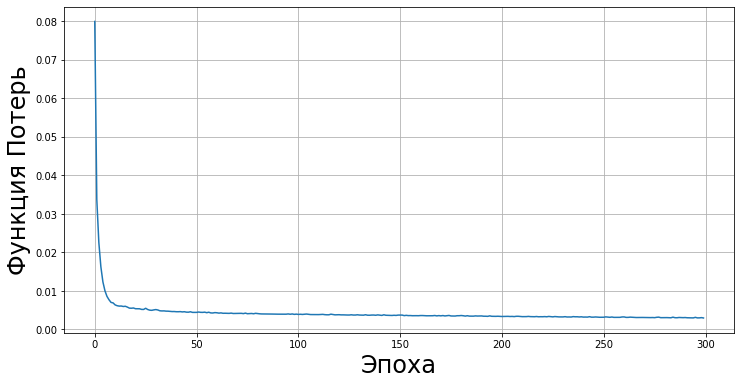

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

regr_poly_scale = LinearRegression(learning_rate=0.01,
                            epochs=300, batch_size=10,
                            n_batches=None)

regr_poly_scale.fit(x_train_scaled, y_train)

regr_poly.plot_cost()

R2 train is OK! == 0.8521. R2 test is OK! == 0.8609. Congratulations!


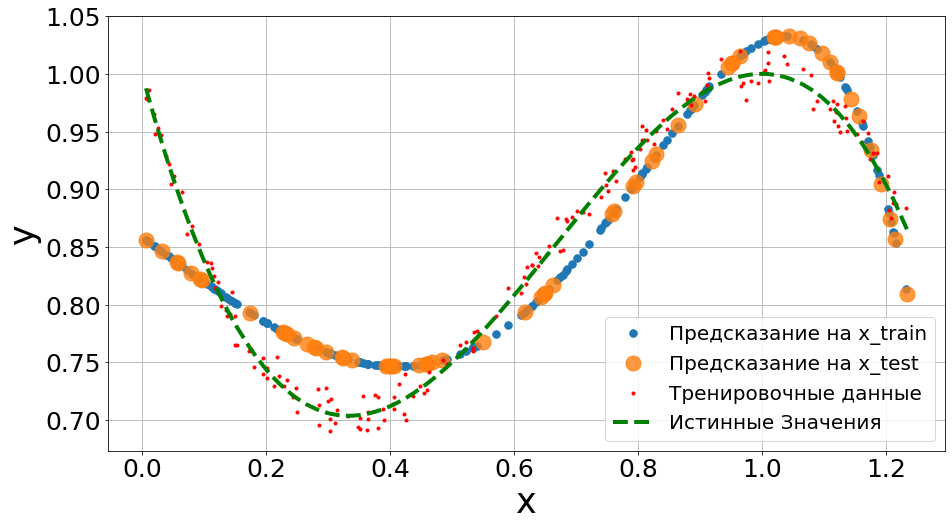

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_train[:,0], regr_poly_scale.predict(x_train_scaled),
        '.', label='Предсказание на x_train',
        markersize = 15)
plt.plot(x_test[:,0], regr_poly_scale.predict(x_test_scaled),
        'o', label='Предсказание на x_test',
        markersize = 15, alpha =0.8)
plt.plot(x_train[:,0], y_train, '.',
        label="Тренировочные данные", linewidth=2,c='r')
plt.plot(x_poly[:,0], y_true_poly, '--',
        label="Истинные Значения", linewidth=4,c='g')

plt.legend(fontsize=20); plt.grid()
plt.xlabel('x',fontsize=35)
plt.ylabel('y',fontsize=35);
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);

r2_print(round(regr_poly_scale.score(x_train_scaled, y_train), 4), round(regr_poly_scale.score(x_test_scaled, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** стало значительно получше

#### Теперь всё то же самое, но с регуляризацией

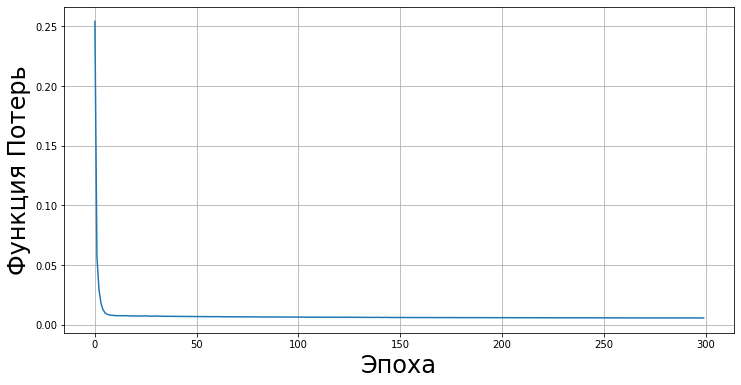

In [ ]:
regr_l1l2 = ElasticRegression(learning_rate=0.01,
                              epochs=300, batch_size=10,
                              l1_penalty = 0.001, l2_penalty = 0.01)  # Тут можно побаловаться с настройками регуляризации и посмотреть, что будет

regr_l1l2.fit(x_train_scaled, y_train)

regr_l1l2.plot_cost()

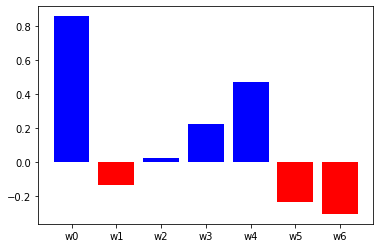

In [ ]:
w, b = regr_l1l2.get_w_and_b()

vis_weigths(np.hstack([b, w]))

R2 train is OK! == 0.8448. R2 test is OK! == 0.8577. Congratulations!


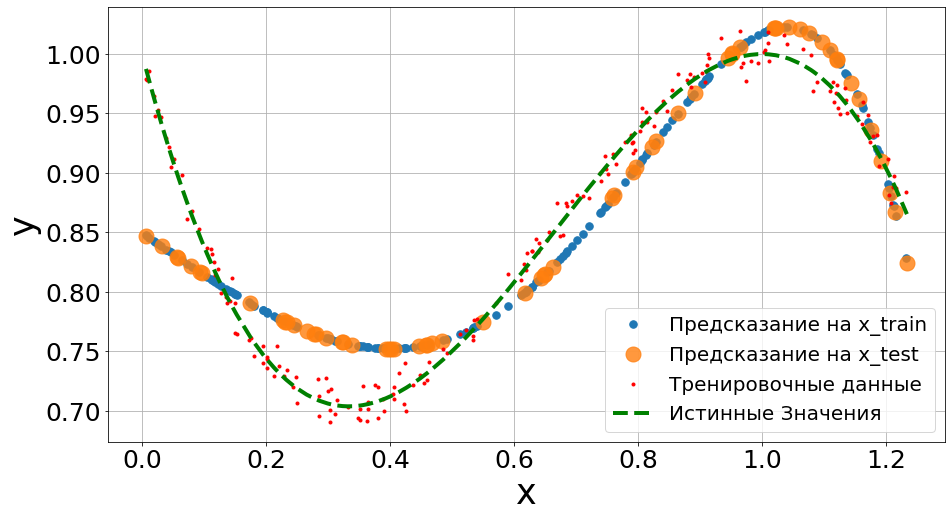

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_train[:,0], regr_l1l2.predict(x_train_scaled),
        '.', label='Предсказание на x_train',
        markersize = 15)
plt.plot(x_test[:,0], regr_l1l2.predict(x_test_scaled),
        'o', label='Предсказание на x_test',
        markersize = 15, alpha =0.8)
plt.plot(x_train[:,0], y_train, '.',
        label="Тренировочные данные", linewidth=2,c='r')
plt.plot(x_poly[:,0], y_true_poly, '--',
        label="Истинные Значения", linewidth=4,c='g')

plt.legend(fontsize=20); plt.grid()
plt.xlabel('x',fontsize=35)
plt.ylabel('y',fontsize=35);
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);

r2_print(round(regr_l1l2.score(x_train_scaled, y_train), 4), round(regr_l1l2.score(x_test_scaled, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

### Модель №4 + бонус (собственная (почти) функция)

#### Заход №1 - применение линейной функции (более-менее)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x_sqrt, y_sqrt,  test_size=0.25) # Тут меняем исходные данные на 4 набор

regr_sqrt_line = LinearRegression(learning_rate=0.01,
                                epochs=300, batch_size=10,
                                n_batches=None)

regr_sqrt_line.fit(x_train, y_train)

R2 train is OK! == 0.9698. R2 test is OK! == 0.954. Congratulations!


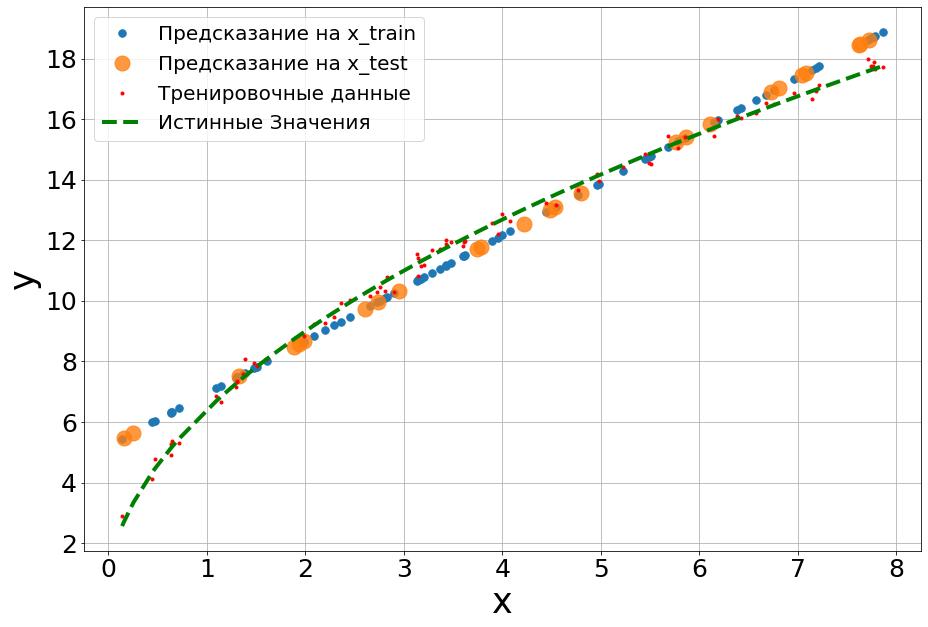

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x_sqrt, y_true_sqrt, regr_sqrt_line)

r2_print(round(regr_sqrt_line.score(x_train, y_train), 4), round(regr_sqrt_line.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** в принципе, судя по метрике, можно было бы обойтись линейной функцией. Но мы будем стремиться к совершенству.

#### Заход №2 - добавление полиномов (почти идеально)

In [ ]:
x_ = to_polynom(x_sqrt, order = 2) # Произвольно балуемся со степенями полинома и смотрим изменения

x_train, y_train,  x_test, y_test = train_test_split(x_, y_sqrt, test_size=0.25)

In [ ]:
regr_sqrt = LinearRegression(learning_rate=0.001,
                            epochs=300, batch_size=10,
                            n_batches=None)

In [ ]:
regr_sqrt.fit(x_train, y_train) # Возникает ошибка при любой степени, большей, чем 1

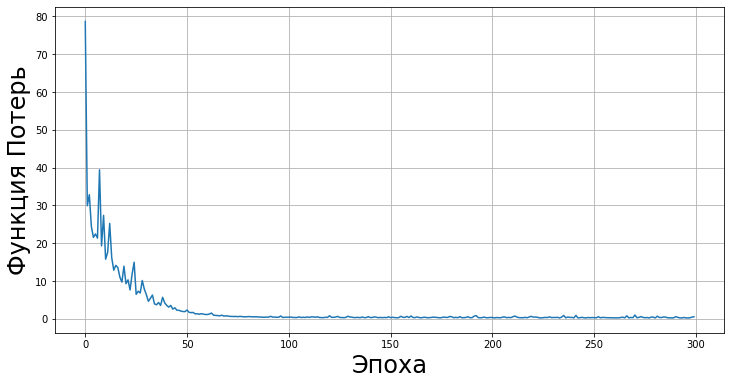

In [ ]:
regr_sqrt.plot_cost()

R2 train is OK! == 0.9851. R2 test is OK! == 0.9852. Congratulations!


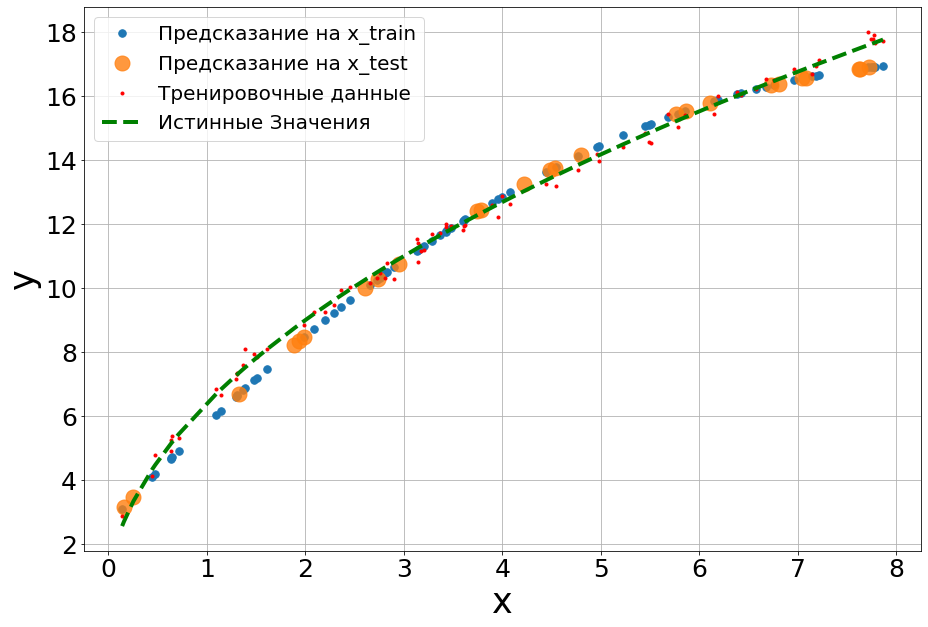

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x_sqrt, y_true_sqrt, regr_sqrt)

r2_print(round(regr_sqrt.score(x_train, y_train), 4), round(regr_sqrt.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** почти идеально, но в целях перфекционизма надо писать свою функцию добавления корней, чтобы решить эту задачу.

#### Заход №3 - добавление функции to_root

In [ ]:
# Своя (почти) функция добавления корешков

def to_root(x, order = 1, add_bias = False):
    order_range = range(0 if add_bias else 1, order + 1, 1)
    x = np.atleast_1d(x)[:]
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x, 1/i))
    return out.reshape(-1, x.size).T

In [ ]:
x_ = to_root(x_sqrt, order = 3) # Произвольно балуемся со степенями корня и смотрим изменения

x_train, y_train,  x_test, y_test = train_test_split(x_, y_sqrt, test_size=0.25)

In [ ]:
regr_sqrt = LinearRegression(learning_rate=0.01,
                            epochs=300, batch_size=10,
                            n_batches=None)

In [ ]:
regr_sqrt.fit(x_train, y_train) #

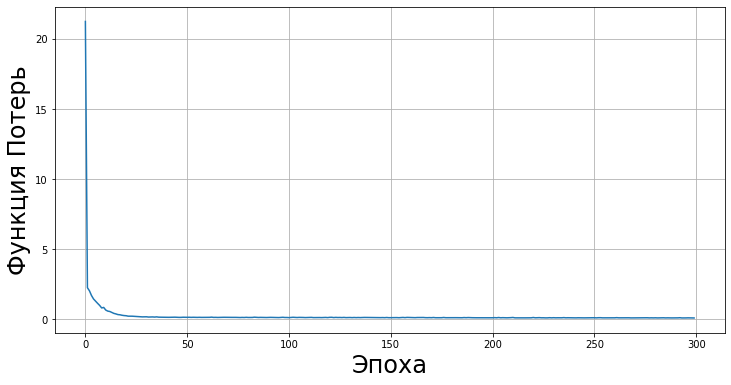

In [ ]:
regr_sqrt.plot_cost()

R2 train is OK! == 0.9949. R2 test is OK! == 0.9927. Congratulations!


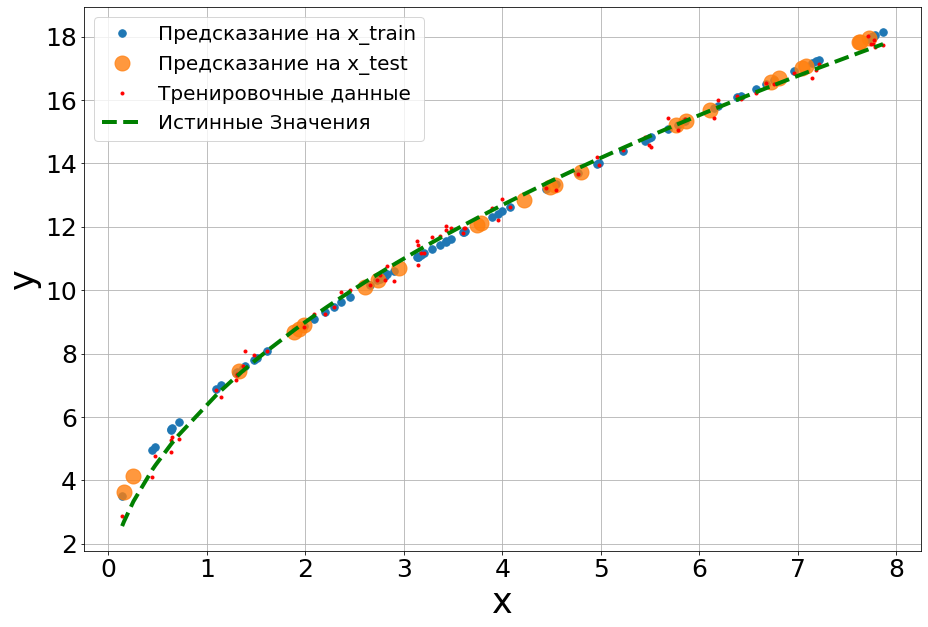

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x_sqrt, y_true_sqrt, regr_sqrt)

r2_print(round(regr_sqrt.score(x_train, y_train), 4), round(regr_sqrt.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** УРА!

### Попробую добавить регуляризации

In [ ]:
regr_l1l2 = ElasticRegression(learning_rate=0.01,
                              epochs=300, batch_size=10,
                              l1_penalty = 0.1, l2_penalty = 0.005)  #

regr_l1l2.fit(x_train, y_train)

R2 train is OK! == 0.9948. R2 test is OK! == 0.9926. Congratulations!


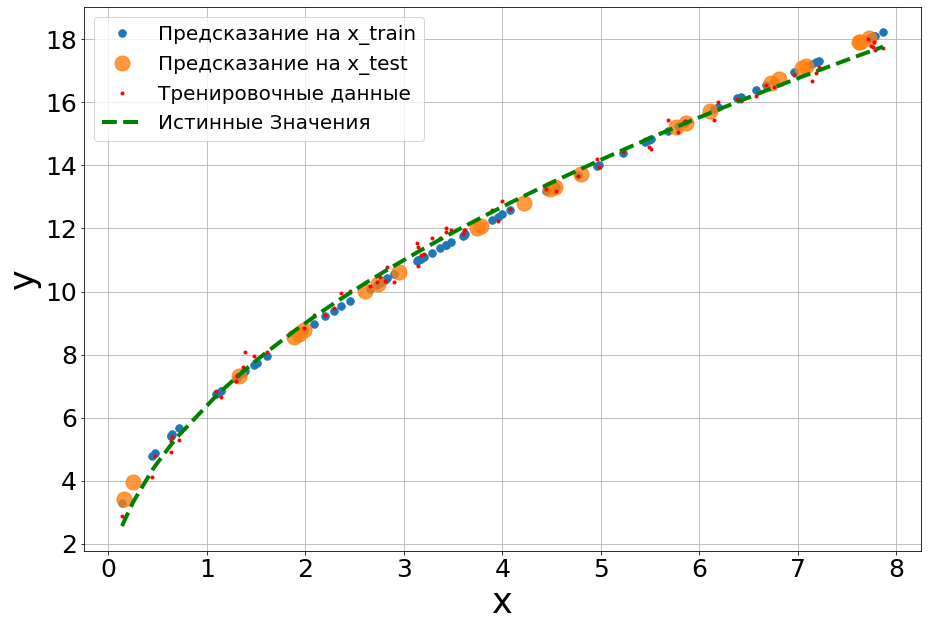

In [ ]:
fig  = plt.figure(figsize=(15, 10))

plot_model_class(x_train, y_train, x_test, x_sqrt, y_true_sqrt, regr_l1l2)

r2_print(round(regr_l1l2.score(x_train, y_train), 4), round(regr_l1l2.score(x_test, y_test), 4))  # Вывожу R2 скоринги через собственноручно написанную функцию (с разукрасками)

**Вывод:** Тоже всё замечательно.

# Раздел 2 - работа с пользовательскими данными

## Загрузка исходных датасетов и импорт недостающих библиотек

In [ ]:
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
uploaded = files.upload()

Saving cars_moldova_onehot_MC.csv to cars_moldova_onehot_MC.csv


In [ ]:
df = pd.read_csv('/content/cars_moldova_onehot (1).csv', delimiter = ',') # Это созданный мной в прошлый раз файл с новыми признаками, часть уже преобразована в one_hot

In [ ]:
df.sample(5) # Смотрим, что всё ОК

,Make,make_price,Model,Year,Distance,Engine_capacity(cm3),Transmission,Price,Rating,Age,...,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Class_A,Class_B,Class_C,Class_D,Class_K
14099,71,8232.262522,139,2016,100000.0,1364.0,False,12500.0,89.0,6,...,0,0,0,0,0,1,0,0,0,0
31999,59,1368.625000,44,2004,156000.0,1400.0,False,1400.0,84.0,18,...,0,0,0,1,0,1,0,0,0,0
32176,73,963.266667,26,2000,131000.0,1500.0,False,1250.0,86.0,22,...,0,0,0,1,0,0,1,0,0,0
14255,71,8232.262522,139,2007,247000.0,1400.0,False,6000.0,89.0,15,...,0,0,0,0,0,1,0,0,0,0
6717,32,13029.294776,701,2019,31000.0,2000.0,True,20000.0,86.0,3,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df.info() # Немножко актуальной инфы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Make                      32220 non-null  int64  
 1   make_price                32220 non-null  float64
 2   Model                     32220 non-null  int64  
 3   Year                      32220 non-null  int64  
 4   Distance                  32220 non-null  float64
 5   Engine_capacity(cm3)      32220 non-null  float64
 6   Transmission              32220 non-null  bool   
 7   Price                     32220 non-null  float64
 8   Rating                    32220 non-null  float64
 9   Age                       32220 non-null  int64  
 10  km_year                   32220 non-null  float64
 11  Style_Cabriolet           32220 non-null  int64  
 12  Style_Combi               32220 non-null  int64  
 13  Style_Coupe               32220 non-null  int64  
 14  Style_

## Подготовка необходимого инструментария и данных

In [ ]:
# Новая функция визуализации весов (с надписями)

def vis_weigths(weights, names):
    numbers = np.arange(0, len(weights))
    tick_labels = names
    cc=[''] * len(numbers)
    for n, val in enumerate(weights):
        if val < 0:
            cc[n] = 'red'
        elif val >= 0:
            cc[n] = 'blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0, len(weights)), tick_labels, rotation = 45);

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)

## Преобразование данных, разделение на цифровые и категориальные столбцы

In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'km_year', 'Rating', 'make_price', 'Price']

In [ ]:
df_num = df[num_columns].copy() # У меня будет 6 числовых столбцов, включая добавленный мной признак рейтинга автомобиля

X, y = df_num.drop(columns = ['Price']).values, df_num['Price'].values # Разделяем на массив входных данных и целевой признак

features_names = df_num.drop(columns = ['Price']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Разделяем на обучающую и тестовые части

scaler  = MinMaxScaler()          # Стандартизируем данные
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5
22549,0.36,0.059906,0.250000,0.034433,0.695652,0.029314
22550,0.74,0.199920,0.416667,0.284283,0.695652,0.147220
22551,0.80,0.199920,0.520833,0.362361,0.956522,0.327067
22552,0.60,0.249924,0.375000,0.236567,0.782609,0.084066
22553,0.86,0.229923,0.270833,0.574148,0.521739,0.056154


## Создание простой линейной регрессии, обучение модели (R2 около 0.65)

### Попытка №1, с помощью простой линейной регрессии (фэйл, R2 около 0.65)

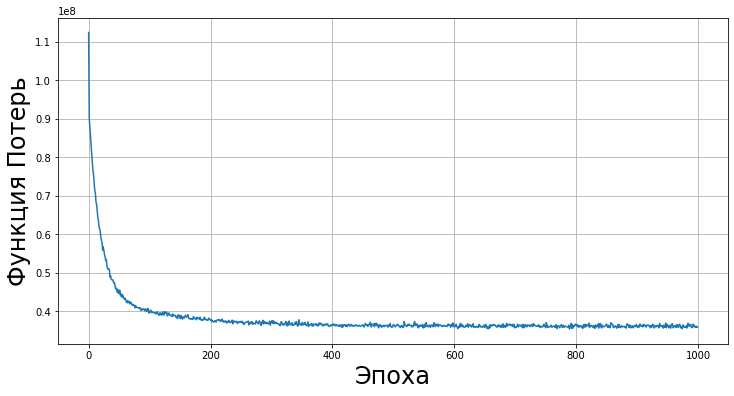

R2 train is low! == 0.6501. R2 test is low! == 0.6397. Try more!


In [ ]:
regr = LinearRegression(learning_rate=0.1, epochs=1000, batch_size=3000) # По графику видно, что примерно где-то после 400-й эпохи динамика стабилизируется

regr.fit(X_train, y_train)

regr.plot_cost()

r2_print(round(regr.score(X_train, y_train), 4), round(regr.score(X_test, y_test), 4))  #

**Вывод:** судя по метрике, результат никудышный.

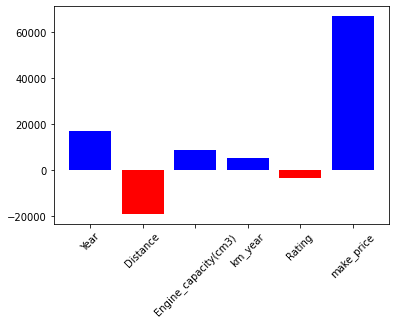

In [ ]:
# Распределение весов (можно примерно оценить влияние признаков на predict)

w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

В принципе, такое распределение весов на первый взгляд соответствует логике ценообразования на подержанный автомобиль. НО! Коэффициенты весов слишком большие.

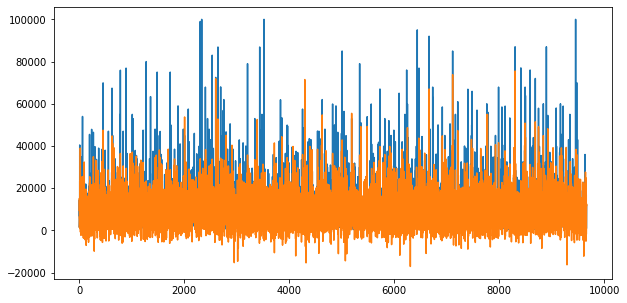

In [ ]:
plt.figure(figsize=(10, 5)) # Рисуем график предсказания из тестовой выборки

yhat = regr.predict(X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

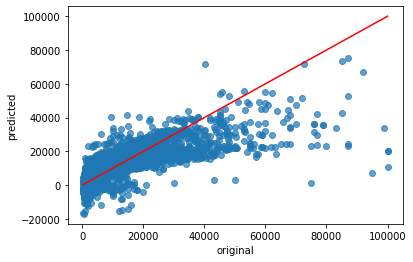

In [ ]:
plt.scatter(y_test, yhat, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

**ВЫВОД:** совершенно неудовлетворительный результат. Слишком большие веса катастрофически влияют на предсказания в тестовой выборке. При этом в некоторых случаев предсказываемые цены на авто являются отрицательными (вероятно, из-за параметра Distance). Нужно пробовать дальше.

### Попытка №2, с помощью линейной регрессии с регуляризацией (тоже фэйл, R2 ухудшается до 0.63 - 0.5, в зависимости от коэффициента регуляризации)

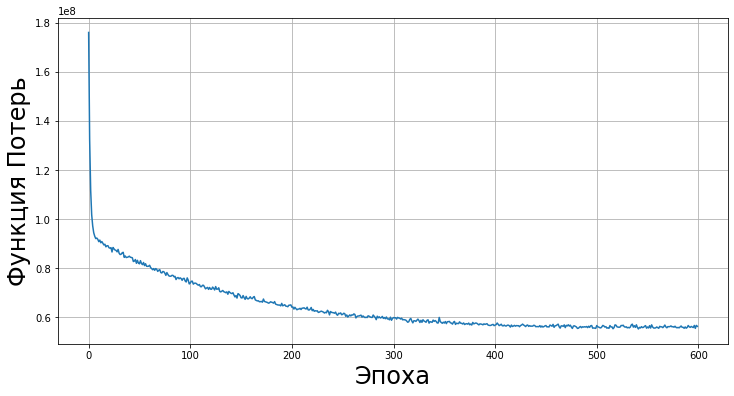

R2 train is low! == 0.5362. R2 test is low! == 0.5317. Try more!


In [ ]:
el_regr = ElasticRegression(learning_rate=0.01, epochs=600, batch_size=3000, l1_penalty=0.1, l2_penalty=0.01) # Где-то с 600-й эпохи идёт рост функции потерь

el_regr.fit(X_train, y_train)

el_regr.plot_cost()

r2_print(round(el_regr.score(X_train, y_train), 4), round(el_regr.score(X_test, y_test), 4))  #

**Вывод:** метрика R2 ухудшилась примерно на 0.1 пункт!

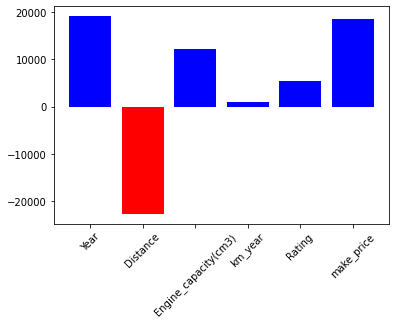

In [ ]:
# Распределение весов после регуляризации

w, b = el_regr.get_w_and_b()

vis_weigths(w, features_names)

**Вывод:** распределение значений весов изменилось, было скорректировано более оптимально

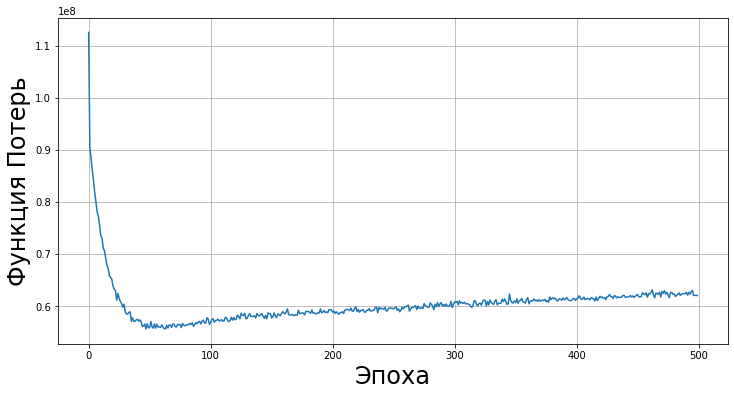

R2 train is low! == 0.5797. R2 test is low! == 0.5696. Try more!


In [ ]:
# Попробую применить регуляризацию Тихонова.

t_regr = RidgeRegression(learning_rate=0.1, epochs=500, batch_size=3000, l2_penalty = 0.01)
t_regr.fit(X_train, y_train)


t_regr.plot_cost()

r2_print(round(t_regr.score(X_train, y_train), 4), round(t_regr.score(X_test, y_test), 4))  #

**Вывод:** после 50 эпох идёт рост функции потерь. В любом случае, применение регуляризации ухудшает и без того унылый результат.

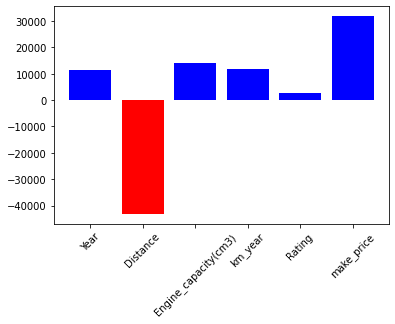

In [ ]:
# Распределение весов после регуляризации Тихонова

w, b = t_regr.get_w_and_b()

vis_weigths(w, features_names)

**Вывод:** несмотря на применение регуляризации (я менял при этом и L1 и L2 в разных диапазонах), просветления не наступило. Веса огроменные, нужно пробовать делать предобработку исходных данных

## Возвращение к истокам - предобработка исходных данных (R2 - 0.77)

In [ ]:
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'km_year', 'Rating', 'Price', 'make_price'] # Берем для работы только столбцы с числовыми признаками

In [ ]:
# Нелинейное преобразование исходных данных (логарифмирование, а потом стандартизация)

DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M) / STD

In [ ]:
df_num = DF_power[num_columns].copy() # У меня будет 6 числовых столбцов, включая добавленный мной признак рейтинга автомобиля

X, y = df_num.drop(columns = ['Price']).values, df_num['Price'].values # Разделяем на массив входных данных и целевой признак

features_names = df_num.drop(columns = ['Price']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Разделяем на обучающую и тестовые части

scaler  = MinMaxScaler()          # Стандартизируем данные
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5
22549,0.362893,0.694538,0.604531,0.466710,0.724565,0.345611
22550,0.742400,0.825257,0.744948,0.798416,0.724565,0.632282
22551,0.801994,0.825257,0.808571,0.837222,0.961947,0.783998
22552,0.603001,0.849485,0.715338,0.769078,0.805485,0.528476
22553,0.861499,0.840432,0.625965,0.910954,0.556922,0.456018


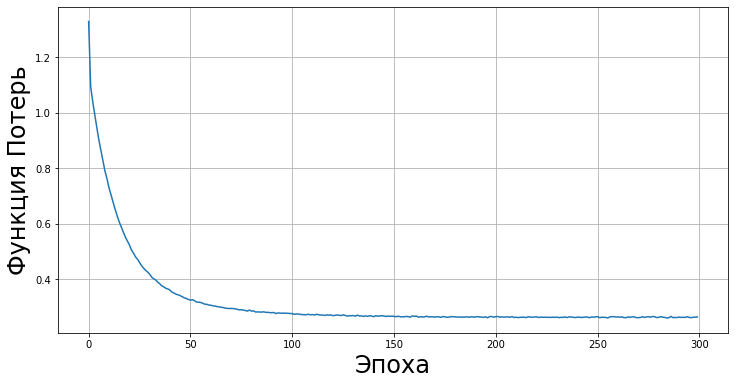

R2 train is better, but no best == 0.7687. R2 test is better, but no best == 0.7754. Try more!


In [ ]:
regr = LinearRegression(learning_rate=0.1, epochs=300, batch_size=3000) #

regr.fit(X_train, y_train)

regr.plot_cost()

r2_print(round(regr.score(X_train, y_train), 4), round(regr.score(X_test, y_test), 4))  #

**Ура!** Значительное улучшение метрики после преобразования исходных данных.

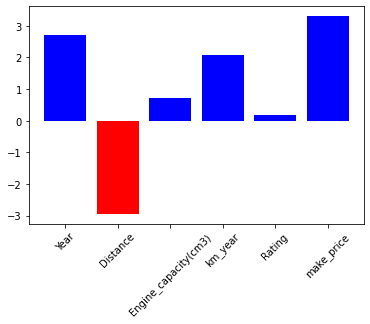

In [ ]:
# Распределение весов (можно примерно оценить влияние признаков на predict)

w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

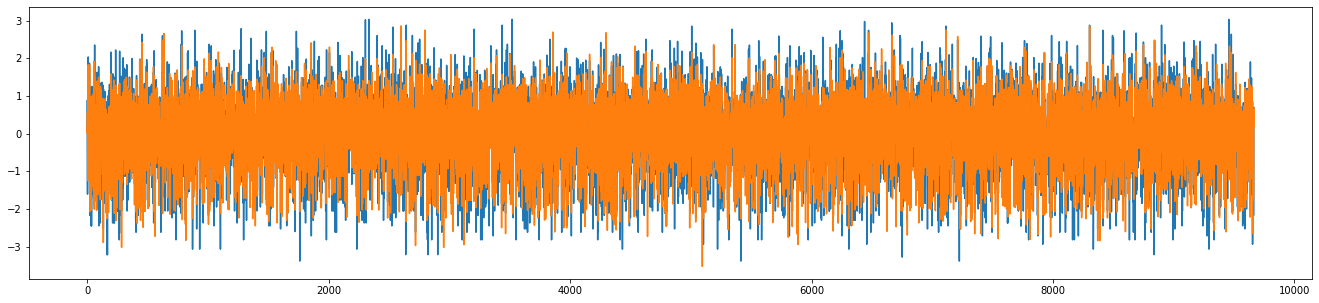

In [ ]:
plt.figure(figsize=(23, 5)) # Рисуем график предсказания из тестовой выборки

yhat = regr.predict(X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

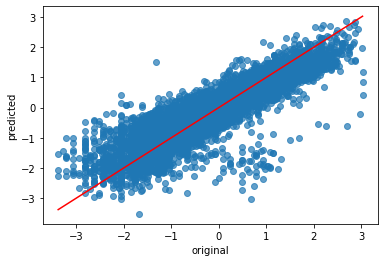

In [ ]:
plt.scatter(y_test, yhat, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

**Вывод:** всё выглядит уже **ЗНАЧИТЕЛЬНО** лучше, плюс коэффициент R2 увеличился примерно на 0.2 пункта и уже приближается к нижней границе приемлимого уровня (0.8). Пробую работать дальше - добавляю категориальных значений.

## Добавление категориальных признаков (R2 - 0.78)

In [ ]:
# Я исключил отсюда числовой признак объема двигателя, так как он по моему мнению больше относится к категориальным и сильно коррелирует с моим новым признаком "класс автомобиля"

num_columns = ['Year', 'Distance', 'km_year', 'Rating', 'Price', 'make_price',
               'Transmission',
               'Class_A', 'Class_B', 'Class_C', 'Class_D', 'Class_K',
               'Style_Cabriolet', 'Style_Combi', 'Style_Coupe', 'Style_Crossover', 'Style_Hatchback', 'Style_Microvan', 'Style_Minivan', 'Style_Pickup', 'Style_Roadster',
               'Style_SUV', 'Style_Sedan', 'Style_Universal',
               'Fuel_type_Electric', 'Fuel_type_Hybrid', 'Fuel_type_Metan/Propan', 'Fuel_type_Petrol', 'Fuel_type_Plug-in Hybrid']

In [ ]:
df_num = DF_power[num_columns].copy() # У меня будет 6 числовых столбцов, включая добавленный мной признак рейтинга автомобиля

X, y = df_num.drop(columns = ['Price']).values, df_num['Price'].values # Разделяем на массив входных данных и целевой признак

features_names = df_num.drop(columns = ['Price']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Разделяем на обучающую и тестовые части

scaler  = MinMaxScaler()          # Стандартизируем данные
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
22549,0.362893,0.694538,0.466710,0.724565,0.345611,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22550,0.742400,0.825257,0.798416,0.724565,0.632282,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22551,0.801994,0.825257,0.837222,0.961947,0.783998,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22552,0.603001,0.849485,0.769078,0.805485,0.528476,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22553,0.861499,0.840432,0.910954,0.556922,0.456018,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


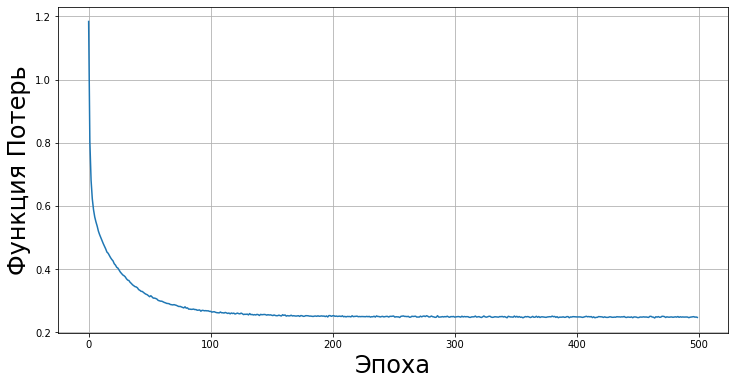

R2 train is better, but no best == 0.7824. R2 test is better, but no best == 0.7888. Try more!


In [ ]:
regr = LinearRegression(learning_rate=0.1, epochs=500, batch_size=3000) #

regr.fit(X_train, y_train)

regr.plot_cost()

r2_print(round(regr.score(X_train, y_train), 4), round(regr.score(X_test, y_test), 4))  #

**R2 подрос ещё на 0.01 пункта**

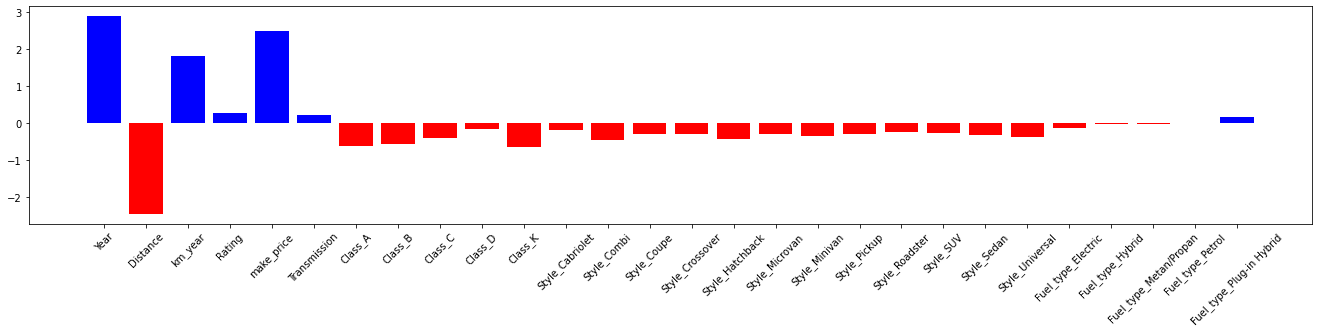

In [ ]:
# Распределение весов (можно примерно оценить влияние признаков на predict)

plt.figure(figsize=(23, 4)) # Рисуем график предсказания из тестовой выборки

w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

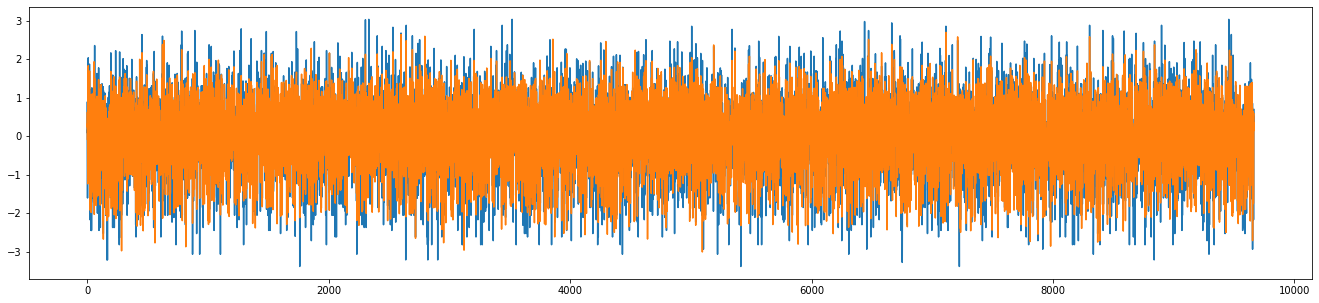

In [ ]:
plt.figure(figsize=(23, 5)) # Рисуем график предсказания из тестовой выборки

yhat = regr.predict(X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

## Добавление полиномов (победа - подняли R2 до 0.8!)

In [ ]:
df_num = DF_power[num_columns].copy() #

X, y = df_num.drop(columns = ['Price']).values, df_num['Price'].values # Разделяем на массив входных данных и целевой признак

features_names = df_num.drop(columns = ['Price']).columns

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.346427,-0.631957,0.726741,0.04003,3.791816,True,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1.622673,-4.70673,-2.720638,0.04003,3.749487,True,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1.622673,-4.834227,-2.856463,0.04003,3.749487,True,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1.622673,-4.834227,-2.856463,0.04003,3.749487,True,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.622673,-3.734418,-1.684812,0.99849,3.660936,True,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### Подкостыливание функции добавления полиномов

In [ ]:
numeric_col = 5 # Количество цифровых столбцов для преобразования

for i in range(numeric_col):
    X_ = to_polynom(X[:, 0], 3)   # --> Практика показала, что добавление полиномов больше 3-й степени бессмысленно, так как R2 практически не увеличивается
    #X_ = to_root(X[:, 0], 2)
    X = np.delete(X, 0, axis=1)
    X = np.append(X, X_, axis=1)

In [ ]:
# Добавляем полиномов в ручном режиме

col = 4

#X_ = to_polynom(X[:, col], 4)
X_ = to_root(X[:, col], 2)

X = np.delete(X, col, axis=1)
X = np.append(X, X_, axis=1)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,True,0,0,0,1,0,0,0,0,0,...,-0.252384,0.726741,0.528152,0.38383,0.04003,0.001602,0.000064,3.791816,14.377866,54.518218
1,True,0,0,1,0,0,0,0,1,0,...,-104.269646,-2.720638,7.40187,-20.137807,0.04003,0.001602,0.000064,3.749487,14.058651,52.712726
2,True,0,0,1,0,0,0,0,0,0,...,-112.974693,-2.856463,8.159383,-23.306977,0.04003,0.001602,0.000064,3.749487,14.058651,52.712726
3,True,0,0,1,0,0,0,0,1,0,...,-112.974693,-2.856463,8.159383,-23.306977,0.04003,0.001602,0.000064,3.749487,14.058651,52.712726
4,True,0,0,1,0,0,0,0,0,0,...,-52.079755,-1.684812,2.838591,-4.782492,0.99849,0.996983,0.995478,3.660936,13.402454,49.065531


### Стандартизация, вывод

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Разделяем на обучающую и тестовые части, запоминаем состояние

scaler  = MinMaxScaler()          # Стандартизируем данные
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982097,0.853094,0.010056,0.977236,0.845257,0.030488,0.949119,0.534794,0.000661,0.563877
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982217,0.704520,0.008344,0.975508,0.724565,0.000000,0.944082,0.221194,0.331503,0.456244
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982083,0.797070,0.000785,0.976273,0.724565,0.000000,0.944082,0.478506,0.006766,0.563554
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982070,0.753903,0.000765,0.976231,0.805485,0.014224,0.945691,0.666809,0.077784,0.576100
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.962537,0.390186,0.246769,0.856579,0.724565,0.000000,0.944082,0.412916,0.043285,0.558790


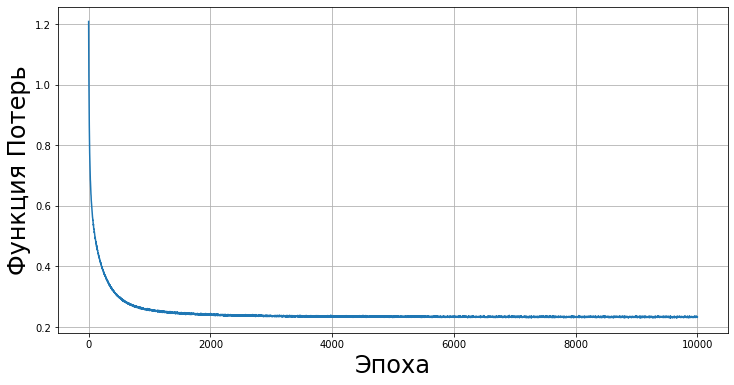

R2 train is OK! == 0.7953. R2 test is OK! == 0.8018. Congratulations!


In [ ]:
regr = LinearRegression(learning_rate=0.01, epochs=10000, batch_size=3000) #

regr.fit(X_train, y_train)

regr.plot_cost()

r2_print(round(regr.score(X_train, y_train), 4), round(regr.score(X_test, y_test), 4))  #

**R2 увеличилось** до приемлимого уровня 0.8! Ура!

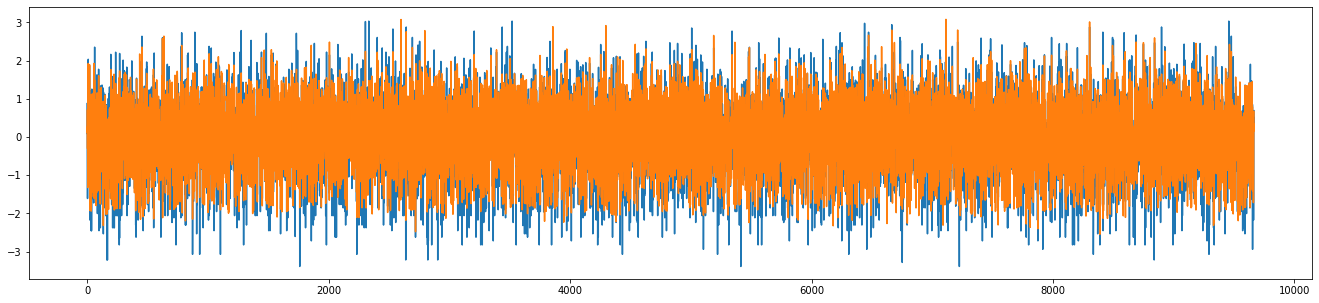

In [ ]:
plt.figure(figsize=(23, 5)) # Рисуем график предсказания из тестовой выборки

yhat = regr.predict(X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

## **ФИНАЛ!** Добавление one-hot разбиения по единому критерию Марка+Модель (>800 стоблцов). Охапка дров и **R2=0.82** готов!

In [ ]:
dff = pd.read_csv('/content/cars_moldova_onehot_full (1).csv', delimiter = ',') # Это датасет, в котором добавлен признак Марка+Модель в one_hot

**Зачем я так сделал?** В ходе предварительной визуализации (на прошлом проекте) я заметил, что конкретная модель автомобиля (в сочетании с маркой, например Тойота Приус, Ламборджини диабло и т.п.) сильно коррелирует со стоимостью данного автомобиля. Это, в общем, логично и это самое главное, что влияет на цену. Все остальные признаки - пробеги, года и т.п. - вторичны. Можно было бы постараться разбить на премиальные и дешевые марки, чтобы сократить количество one-hot столбцов. Но я подумал - чего мелочиться? Компьютер считает, я пью чай, каждый занят своим делом. Спешить некуда. Поэтому я в предобработке соединил значения из столбцов Make и Model в единый признак, а потом разбил его в one-hot-encoding.

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 870 entries, Year to Class_K
dtypes: bool(1), float64(5), int64(864)
memory usage: 213.6 MB


In [ ]:
# Нелинейное преобразование исходных данных (логарифмирование, а потом стандартизация)

num_columns = ['Year', 'Distance', 'km_year', 'Rating', 'Price'] # Берем для работы только столбцы с числовыми признаками

DF_power  = dff.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M) / STD

In [ ]:
df_num = DF_power.copy() #

X, y = df_num.drop(columns = ['Price']).values, df_num['Price'].values # Разделяем на массив входных данных и целевой признак

features_names = df_num.drop(columns = ['Price']).columns

numeric_col = 3 # Количество цифровых столбцов для преобразования

for i in range(numeric_col):
    X_ = to_polynom(X[:, 0], 3)   # --> Практика показала, что добавление полиномов больше 3-й степени бессмысленно, так как R2 практически не увеличивается
    X = np.delete(X, 0, axis=1)
    X = np.append(X, X_, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Разделяем на обучающую и тестовые части

scaler  = MinMaxScaler()          # Стандартизируем данные
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
22549,0.0,0.724565,0.64,0.466710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.362893,0.265010,0.831726,0.694538,0.015029,0.980265,0.250000,0.076923,0.021889
22550,1.0,0.724565,0.26,0.798416,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.742400,0.000000,0.963154,0.825257,0.001810,0.982150,0.416667,0.192308,0.085125
22551,1.0,0.961947,0.20,0.837222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.801994,0.005161,0.963517,0.825257,0.001810,0.982150,0.520833,0.290465,0.157410
22552,0.0,0.805485,0.40,0.769078,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.603001,0.037512,0.956142,0.849485,0.005351,0.982459,0.375000,0.158654,0.063940
22553,0.0,0.556922,0.14,0.910954,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.861499,0.022983,0.966522,0.840432,0.003809,0.982305,0.270833,0.088542,0.026938


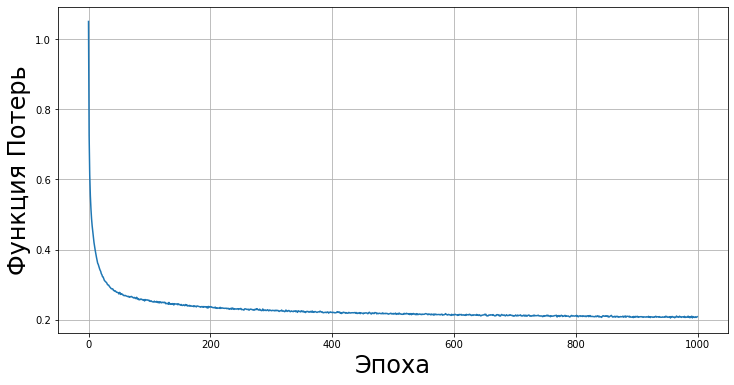

R2 train is OK! == 0.8181. R2 test is OK! == 0.8195. Congratulations!


In [ ]:
regr = LinearRegression(learning_rate=0.1, epochs=1000, batch_size=3000) #

regr.fit(X_train, y_train)

regr.plot_cost()

r2_print(round(regr.score(X_train, y_train), 4), round(regr.score(X_test, y_test), 4))  #

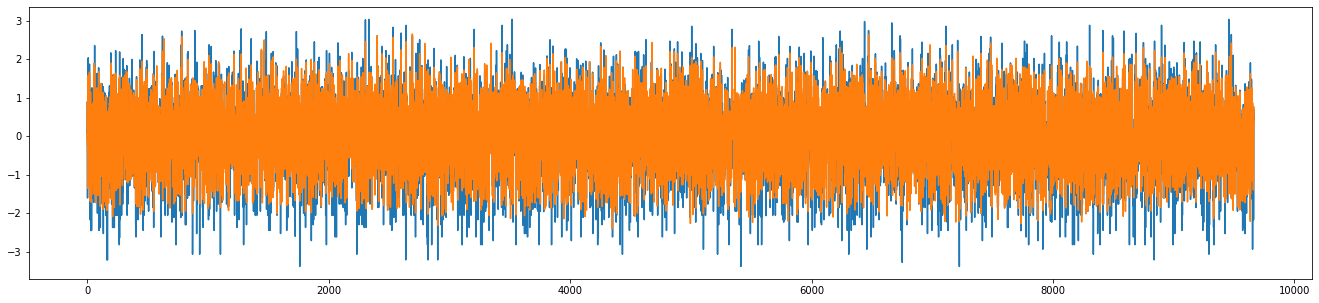

In [ ]:
plt.figure(figsize=(23, 5)) # Рисуем график предсказания из тестовой выборки

yhat = regr.predict(X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

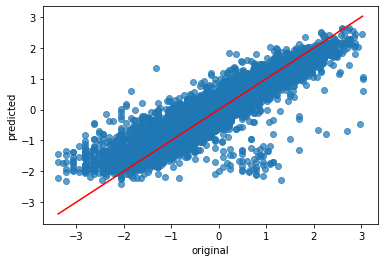

In [ ]:
plt.scatter(y_test, yhat, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

**Вывод:** ни о чём не жалею, в следующий раз так же сделаю (зафигачу всё в one-hot). :D

## **Переигровка**! Существенное сокращение набора one-hot признаков при приемлемой точности (R2=0.8)

Коллега по учёбе подсказал мне, что можно попробовать создать новый категориальный признак путём соединения марки автомобиля (Make) и его класса (Class), который я создавал на предыдущем практическом занятии. Логика здесь просматривается, так как Тойоты B класса стоят более-менее одинаково, как и другие марки, основная разбежка цены в пределах одной марки идёт между классами. Проверяем, как это сработает на практике.

In [ ]:
dff = pd.read_csv('/content/cars_moldova_onehot_MC.csv', delimiter = ',') # Это датасет, в котором добавлен признак Марка + Класс в one_hot

In [ ]:
dff.drop('make_price', axis=1, inplace=True) # Этот признак здесь излишний

In [ ]:
dff.info() # По сравнению с предыдущим вариантом приличное уменьшение датасета (как по занимаемой памяти, так и по объему столбцов)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 272 entries, Year to Class_K
dtypes: bool(1), float64(5), int64(266)
memory usage: 66.6 MB


In [ ]:
# Нелинейное преобразование исходных данных (логарифмирование, а потом стандартизация)

num_columns = ['Year', 'Distance', 'km_year', 'Rating', 'Price'] # Берем для работы только столбцы с числовыми признаками

DF_power  = dff.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M) / STD

In [ ]:
df_num = DF_power.copy() #

X, y = df_num.drop(columns = ['Price']).values, df_num['Price'].values # Разделяем на массив входных данных и целевой признак

features_names = df_num.drop(columns = ['Price']).columns

numeric_col = 3 # Количество цифровых столбцов для преобразования

for i in range(numeric_col):
    X_ = to_polynom(X[:, 0], 3)   # --> Практика показала, что добавление полиномов больше 3-й степени бессмысленно, так как R2 практически не увеличивается
    X = np.delete(X, 0, axis=1)
    X = np.append(X, X_, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Разделяем на обучающую и тестовые части

scaler  = MinMaxScaler()          # Стандартизируем данные
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
22549,0.0,0.724565,0.64,0.466710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.362893,0.265010,0.831726,0.694538,0.015029,0.980265,0.250000,0.076923,0.021889
22550,1.0,0.724565,0.26,0.798416,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.742400,0.000000,0.963154,0.825257,0.001810,0.982150,0.416667,0.192308,0.085125
22551,1.0,0.961947,0.20,0.837222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.801994,0.005161,0.963517,0.825257,0.001810,0.982150,0.520833,0.290465,0.157410
22552,0.0,0.805485,0.40,0.769078,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.603001,0.037512,0.956142,0.849485,0.005351,0.982459,0.375000,0.158654,0.063940
22553,0.0,0.556922,0.14,0.910954,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.861499,0.022983,0.966522,0.840432,0.003809,0.982305,0.270833,0.088542,0.026938


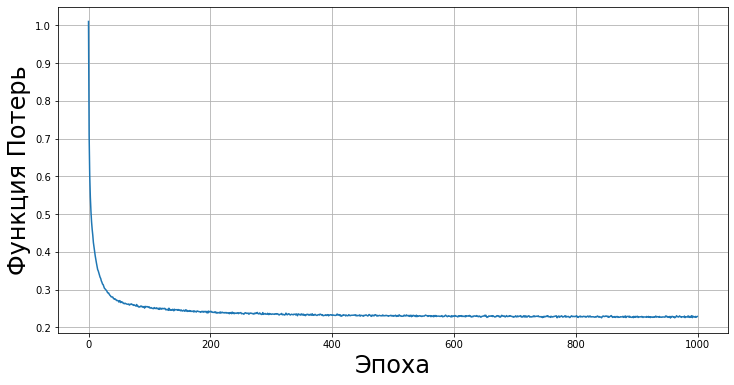

R2 train is OK! == 0.8003. R2 test is OK! == 0.8047. Congratulations!


In [ ]:
regr = LinearRegression(learning_rate=0.1, epochs=1000, batch_size=3000) #

regr.fit(X_train, y_train)

regr.plot_cost()

r2_print(round(regr.score(X_train, y_train), 4), round(regr.score(X_test, y_test), 4))  #

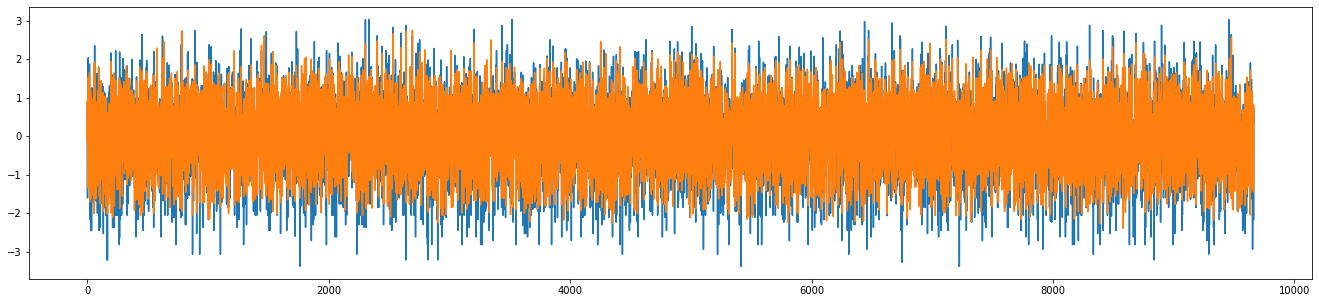

In [ ]:
plt.figure(figsize=(23, 5)) # Рисуем график предсказания из тестовой выборки

yhat = regr.predict(X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

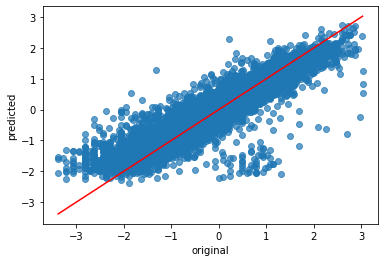

In [ ]:
plt.scatter(y_test, yhat, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

**Вывод:** на практике это сработало хорошо. Считаю, что это наиболее оптимальная модель, которую я сделал.